# spam or ham(email filteration)

In [2]:
#basic library
import numpy as np
import pandas as pd

#Visualization of data
import matplotlib.pyplot as plt
import seaborn as sns

#deep-learning library
import keras
import tensorflow as tf

Using TensorFlow backend.


In [3]:
df = pd.read_csv("..//data//spam.csv", delimiter=',', encoding='latin-1')
df.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


# drop cloumn that are not required for neural network

In [4]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
v1    5572 non-null object
v2    5572 non-null object
dtypes: object(2)
memory usage: 87.1+ KB


In [5]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Text(0.5, 1.0, 'number of harm and spam messages')

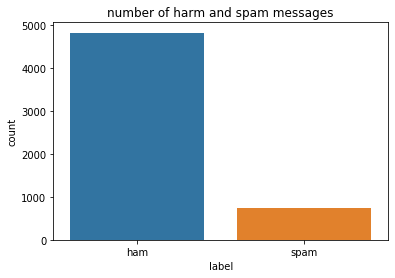

In [6]:
sns.countplot(df.v1)
plt.xlabel('label')
plt.title("number of harm and spam messages")

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
%matplotlib inline

In [8]:
#create input and output vector
X = df.v2
Y = df.v1
le = LabelEncoder()


In [9]:
Y = le.fit_transform(Y)
Y = Y.reshape(-1,1)

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=40)
print("Size of X_train, X_test, Y_train, Y_test: ", X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

Size of X_train, X_test, Y_train, Y_test:  (4736,) (836,) (4736, 1) (836, 1)


Tokenize the data and convert the text to sequences.
Add padding to ensure that all the sequences have the same shape.
There are many ways of taking the max_len and here an arbitrary length of 150 is chosen.

In [11]:
max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [12]:
len(sequences_matrix)

4736

# RNN

In [13]:
def RNN():
    inputs = Input(name='inputs', shape=[max_len])
    layer = Embedding(max_words, 50, input_length=max_len)(inputs)
    layer = LSTM(64)(layer)
    layer = Dense(256, name = 'FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(1, name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    
    return model

In [14]:
#call the function and compile the model
model = RNN()
model.summary()
model.compile(loss= 'binary_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])


W0819 19:12:36.882276  6100 deprecation_wrapper.py:119] From C:\Users\rajeevranjan.sharma\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0819 19:12:36.895241  6100 deprecation_wrapper.py:119] From C:\Users\rajeevranjan.sharma\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0819 19:12:36.896239  6100 deprecation_wrapper.py:119] From C:\Users\rajeevranjan.sharma\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0819 19:12:37.090188  6100 deprecation_wrapper.py:119] From C:\Users\rajeevranjan.sharma\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:133: The n

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 150, 50)           50000     
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                29440     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               16640     
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)                 257       
__________

In [15]:
history = model.fit(sequences_matrix, Y_train, batch_size = 128, epochs=10, validation_split=0.2)#, callbacks=[EarlyStopping(monitor='val_loss', min_delta=0.001)])

Train on 3788 samples, validate on 948 samples
Epoch 1/10
3788/3788 [==============================] - 3s 831us/step - loss: 0.3254 - acc: 0.8709 - val_loss: 0.1551 - val_acc: 0.9810
Epoch 2/10
3788/3788 [==============================] - 3s 665us/step - loss: 0.0852 - acc: 0.9776 - val_loss: 0.0584 - val_acc: 0.9873
Epoch 3/10
3788/3788 [==============================] - 3s 674us/step - loss: 0.0408 - acc: 0.9886 - val_loss: 0.0568 - val_acc: 0.9884
Epoch 4/10
3788/3788 [==============================] - 3s 688us/step - loss: 0.0310 - acc: 0.9905 - val_loss: 0.0639 - val_acc: 0.9884
Epoch 5/10
3788/3788 [==============================] - 3s 714us/step - loss: 0.0231 - acc: 0.9934 - val_loss: 0.0585 - val_acc: 0.9895
Epoch 6/10
3788/3788 [==============================] - 3s 669us/step - loss: 0.0163 - acc: 0.9939 - val_loss: 0.0668 - val_acc: 0.9852
Epoch 7/10
3788/3788 [==============================] - 2s 656us/step - loss: 0.0112 - acc: 0.9971 - val_loss: 0.1001 - val_acc: 0.9863
E

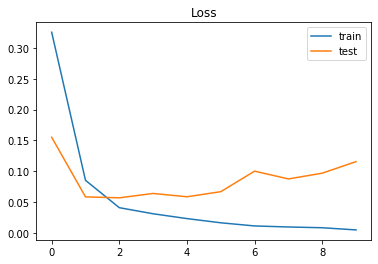

In [16]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();


The model performs well on the validation set and this configuration is chosen as the final model.

Process the test set data.

In [17]:
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)

In [18]:
#Evaluate the model on the test set.

accr = model.evaluate(test_sequences_matrix,Y_test)

836/836 [==============================] - 0s 312us/step


In [19]:
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

Test set
  Loss: 0.110
  Accuracy: 0.989


In [20]:
test_sequences[0]

[146, 657, 9, 559, 177, 684, 926, 559, 406, 20, 333, 26, 1, 558, 126, 24]

In [21]:
test_sequences_matrix[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0, 146, 657,   9, 559, 177, 684, 926, 559, 406,
        20, 333,  26,   1, 558, 126,  24])

In [23]:
model_pred = model.predict(test_sequences_matrix)
model_pred

array([[0.00000000e+00],
       [9.99999821e-01],
       [9.99867916e-05],
       [0.00000000e+00],
       [2.98023224e-08],
       [0.00000000e+00],
       [0.00000000e+00],
       [4.76837158e-07],
       [5.96046448e-08],
       [2.93514132e-03],
       [0.00000000e+00],
       [2.68220901e-07],
       [7.32541084e-05],
       [2.98023224e-08],
       [0.00000000e+00],
       [5.20378351e-04],
       [0.00000000e+00],
       [5.96046448e-08],
       [8.94069672e-08],
       [1.78813934e-07],
       [1.87754631e-06],
       [1.43051147e-06],
       [0.00000000e+00],
       [0.00000000e+00],
       [9.99997437e-01],
       [1.84178352e-05],
       [0.00000000e+00],
       [8.73208046e-06],
       [7.46101141e-04],
       [1.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [1.19209290e-07],
       [3.60608101e-06],
       [0.00000000e+00],
       [1.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [1.31130219e-06],
       [9.23871994e-07],


In [24]:
from sklearn.metrics import classification_report,confusion_matrix
Y_pred = model.predict(test_sequences_matrix)
y_pred = np.array([np.argmax(pred) for pred in Y_pred])
print('  Classification Report:\n',classification_report(Y_test,y_pred),'\n')



  Classification Report:
               precision    recall  f1-score   support

           0       0.87      1.00      0.93       729
           1       0.00      0.00      0.00       107

    accuracy                           0.87       836
   macro avg       0.44      0.50      0.47       836
weighted avg       0.76      0.87      0.81       836
 



C:\Users\rajeevranjan.sharma\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [59]:
for ind, elt in enumerate(X_test):
    if model_pred[ind] > 0.5:
        pred = 1
    else:
        pred = 0
    
    if pred != Y_test[ind]:
        print("Text: ", elt)
        print("real output: ", Y_test[ind])
        print("pred output: ", model_pred[ind])

Text:  Money i have won wining number 946 wot do i do next
real output:  [1]
pred output:  [6.556511e-07]
Text:  Sorry I missed your call let's talk when you have the time. I'm on 07090201529
real output:  [1]
pred output:  [1.4901161e-07]
Text:  I (Career Tel) have added u as a contact on INDYAROCKS.COM to send FREE SMS. To remove from phonebook - sms NO to  &lt;#&gt;
real output:  [0]
pred output:  [0.9812201]
Text:  The new deus ex game comin early next yr
real output:  [0]
pred output:  [0.9137552]
Text:  Ur balance is now å£600. Next question: Complete the landmark, Big, A. Bob, B. Barry or C. Ben ?. Text A, B or C to 83738. Good luck!
real output:  [1]
pred output:  [0.00016633]
Text:  More people are dogging in your area now. Call 09090204448 and join like minded guys. Why not arrange 1 yourself. There's 1 this evening. Aå£1.50 minAPN LS278BB
real output:  [1]
pred output:  [0.0866743]
Text:  Check Out Choose Your Babe Videos @ sms.shsex.netUN fgkslpoPW fgkslpo
real output:  [1]